# Implementação da Rede Neural Convolucional - CNN

In [7]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Carregar o <i>dataset</i> a partir da estrutura de pastas

In [2]:
nomes_classes = ["rotten", "healthy"]

def load_data_path(path, class_type, x, y):
    for img_path in os.listdir(path):
        img = cv.imread(f'{path}/{img_path}', cv.IMREAD_GRAYSCALE)
        x.append(cv.resize(img, (224, 224)) / 255.0)
        y.append(class_type)


def load_dataset():
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    load_data_path("data/train/Banana__Healthy", 1, x_train, y_train)
    load_data_path("data/train/Banana__Rotten", 0, x_train, y_train)
    load_data_path("data/test/Banana__Healthy", 1, x_test, y_test)
    load_data_path("data/test/Banana__Rotten", 0, x_test, y_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = load_dataset()

## Configurar a NN

In [4]:
nn = keras.models.Sequential()
nn.add(keras.layers.Flatten(input_shape=[224, 224]))

nn.add(keras.layers.Dense(300, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(2, activation="softmax"))

nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │    15,053,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,083,402 (57.54 MB)

 Trainable params: 15,083,402 (57.54 MB)

 Non-trainable params: 0 (0.00 B)

## Treinar a rede

In [5]:
nn.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

history_nn = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6094 - loss: 1.3132 - val_accuracy: 0.7639 - val_loss: 0.4735
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7453 - loss: 0.4852 - val_accuracy: 0.8167 - val_loss: 0.3955
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7897 - loss: 0.4259 - val_accuracy: 0.8194 - val_loss: 0.3683
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8108 - loss: 0.3922 - val_accuracy: 0.8194 - val_loss: 0.3986
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8544 - loss: 0.3308 - val_accuracy: 0.9000 - val_loss: 0.2456
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8613 - loss: 0.3091 - val_accuracy: 0.8833 - val_loss: 0.2612
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.8807 - loss: 0.2766 - val_accuracy: 0.9194 - val_loss: 0.2369
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8839 - loss: 0.2640 - val_accu

## Avaliar os resultados do treinamento

In [11]:
loss, accuracy = nn.evaluate(x_test, y_test, verbose = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8912 - loss: 0.3019 


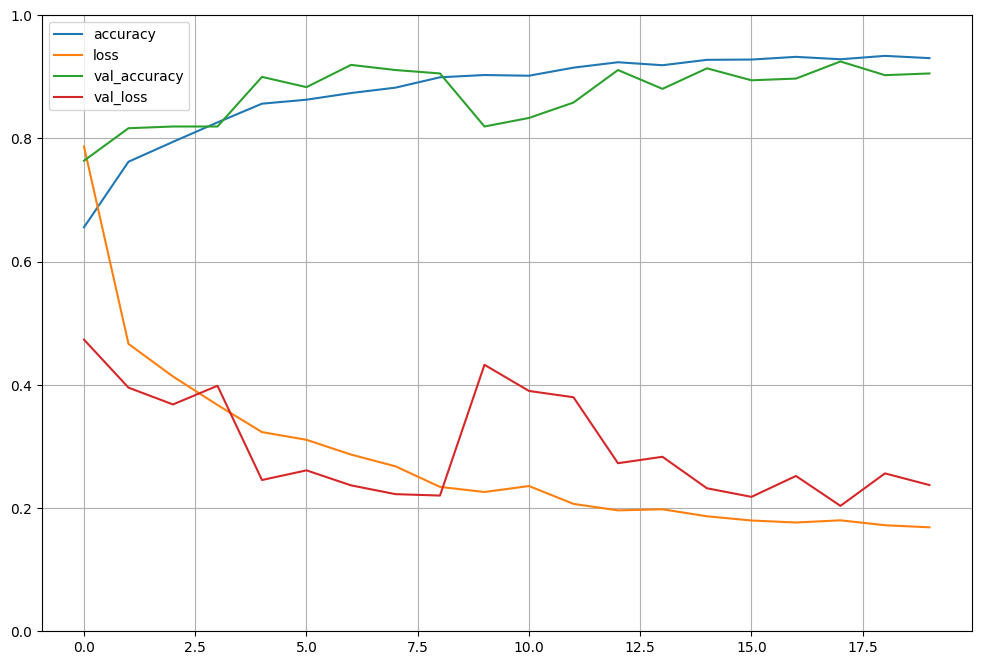

In [12]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Matrizes de confusão de algumas partes do dataset

In [19]:
def monta_matriz_confusao(labels_reais, labels_estimadas, titulo):
    cm = confusion_matrix(labels_reais, labels_estimadas)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nomes_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize = (8, 8))
    disp.plot(cmap = plt.cm.Blues)
    plt.title(titulo)
    plt.xlabel("Classe real")
    plt.ylabel("Classe estimada")
    plt.xticks(rotation =  45)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Previsao: 0 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 0 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1
Previsao: 1 | Verdadeiro: 1


<Figure size 800x800 with 0 Axes>

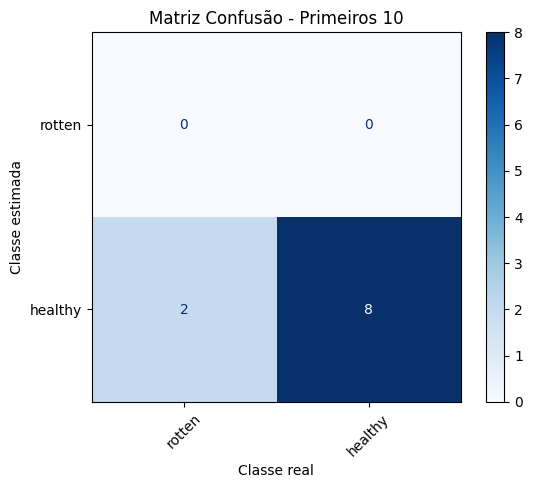

In [20]:
result = nn.predict(x_test[:10])

rotulos_esperados_primeiros_10 = []
rotulos_obtidos_primeiros_10 = []

for i in range(len(result)):
    rotulos_obtidos_primeiros_10.append(np.argmax(result[i], axis=-1))
    rotulos_esperados_primeiros_10.append(y_test[i])
    print(f'Previsao: {np.argmax(result[i], axis=-1)} | Verdadeiro: {y_test[i]}')

monta_matriz_confusao(rotulos_esperados_primeiros_10, rotulos_obtidos_primeiros_10, "Matriz Confusão - Primeiros 10")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 1 | Verdadeiro: 0
Previsao: 1 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 0 | Verdadeiro: 0
Previsao: 

c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:148: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)
c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:148: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)


ValueError: zero-size array to reduction operation maximum which has no identity

<Figure size 800x800 with 0 Axes>

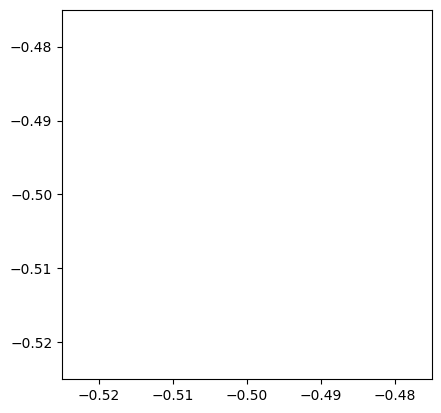

In [29]:
result = nn.predict(x_test[200:])

rotulos_esperados_apos_200 = []
rotulos_obtidos_apos_200 = []

for i in range(len(result)):
    rotulos_obtidos_apos_200.append(np.argmax(result[i], axis=-1))
    rotulos_esperados_apos_200.append(y_test[200 + i])
    print(f'Previsao: {np.argmax(result[i], axis=-1)} | Verdadeiro: {y_test[200 + i]}')

monta_matriz_confusao(rotulos_esperados_apos_200, rotulos_obtidos_apos_200, "Matriz Confusão - Após 200")